<a href="https://colab.research.google.com/github/algo-saurabh/Air-Quality-Monitoring-using-MQ135-Gas-Sensor-and-performing-Time-Series-Analysis/blob/master/TimeSeriesOnSalesData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [0]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt

In [12]:
def parser(x):
    return datetime.strptime(x,'%d-%m-%Y')
airqualitydata = pd.read_csv('/gdrive/My Drive/machine learning/iot/timeSeriesOnSalesData/airquality.csv',index_col=0,parse_dates=[0],date_parser=parser)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


In [13]:
airqualitydata

,Air Quality
Month,
2020-02-01,266
2020-02-02,146
2020-02-03,183
2020-02-04,119
2020-02-05,180
2020-02-06,169
2020-02-07,232
2020-02-08,225
2020-02-09,193


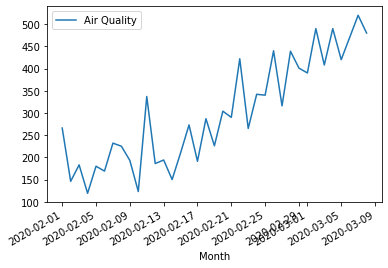

In [14]:
airqualitydata.plot()

## Checking Stationarity of Data 
meaning: mean, variance and covariance is constant over period.

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


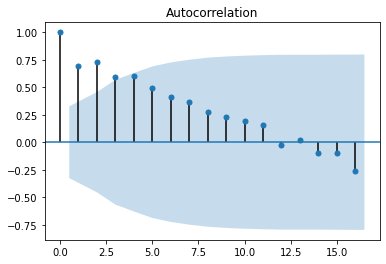

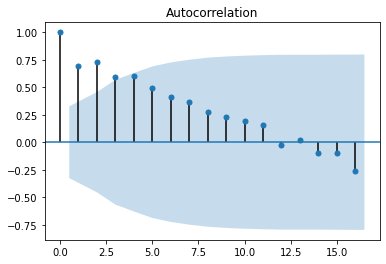

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(airqualitydata)

In [0]:
### converting series to stationary

airqualitydata_diff = airqualitydata.diff(periods=1)
# integrated of order 1, denoted by d(for diff) , one of the paramter of ARIMA Model

In [17]:
airqualitydata_diff = airqualitydata_diff[1:]
airqualitydata_diff.head()

,Air Quality
Month,
2020-02-02,-120.0
2020-02-03,37.0
2020-02-04,-64.0
2020-02-05,61.0
2020-02-06,-11.0


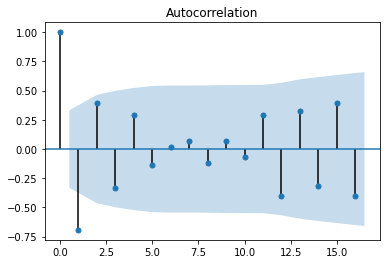

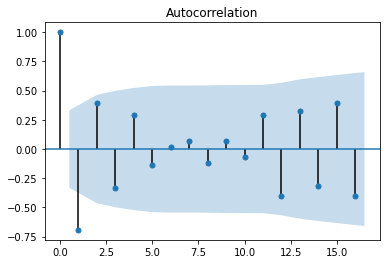

In [18]:
plot_acf(airqualitydata_diff)

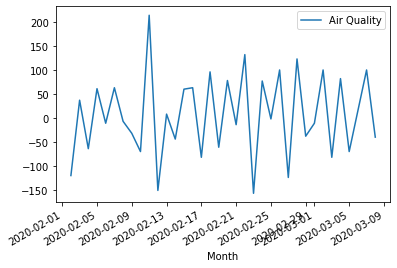

In [19]:
airqualitydata_diff.plot()

Auto Regression Model


In [0]:
## dividing data into train and test data

X = airqualitydata.values
train = X[0:27]  # 27data as train
test = X[26:]  # 9 data to test
predictions = []

In [0]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [0]:
predictions = model_ar_fit.predict(start=26,end=36)

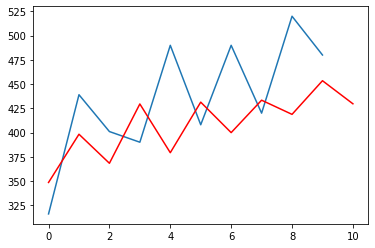

In [24]:
plt.plot(test)
plt.plot(predictions,color='red')

ARIMA MODEL

In [27]:
from statsmodels.tsa.arima_model import ARIMA
#p,d,q   p=periods taken for autoregressive model,
#d-> order of integrated order,
#q = periods moving average
model_arima = ARIMA(train,order=(9,1,0))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)


299.13060488933706


In [28]:
predictions = model_arima_fit.forecast(steps=10)[0]
predictions

array([382.36197918, 346.01884105, 408.24681721, 374.59741599,
       440.58834723, 354.09783472, 413.03903052, 415.78055279,
       483.76022026, 393.7011254 ])

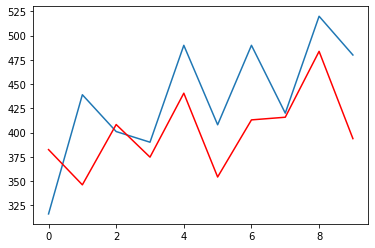

In [29]:
plt.plot(test)
plt.plot(predictions,color='red')

In [30]:
mean_squared_error

<function sklearn.metrics._regression.mean_squared_error>

In [0]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [0]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
  try:
      model_arima = ARIMA(train,order=(4,1,0))
      model_arima_fit = model_arima.fit()
      print(param,model_arima_fit.aic)
  except:
    continue

(0, 0, 0) 285.78402314735104
(0, 0, 1) 285.78402314735104
(0, 0, 2) 285.78402314735104
(0, 0, 3) 285.78402314735104
(0, 0, 4) 285.78402314735104
(0, 1, 0) 285.78402314735104
(0, 1, 1) 285.78402314735104
(0, 1, 2) 285.78402314735104
(0, 1, 3) 285.78402314735104
(0, 1, 4) 285.78402314735104
(0, 2, 0) 285.78402314735104
(0, 2, 1) 285.78402314735104
(0, 2, 2) 285.78402314735104
(0, 2, 3) 285.78402314735104
(0, 2, 4) 285.78402314735104
(0, 3, 0) 285.78402314735104
(0, 3, 1) 285.78402314735104
(0, 3, 2) 285.78402314735104
(0, 3, 3) 285.78402314735104
(0, 3, 4) 285.78402314735104
(0, 4, 0) 285.78402314735104
(0, 4, 1) 285.78402314735104
(0, 4, 2) 285.78402314735104
(0, 4, 3) 285.78402314735104
(0, 4, 4) 285.78402314735104
(1, 0, 0) 285.78402314735104
(1, 0, 1) 285.78402314735104
(1, 0, 2) 285.78402314735104
(1, 0, 3) 285.78402314735104
(1, 0, 4) 285.78402314735104
(1, 1, 0) 285.78402314735104
(1, 1, 1) 285.78402314735104
(1, 1, 2) 285.78402314735104
(1, 1, 3) 285.78402314735104
(1, 1, 4) 285.